In [1]:
pip install pymysql

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
from pymysql import connect
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
database = connect(host = 'localhost', 
                  user = 'root',
                  password = 'Ceaservyshu7&',
                  database = 'capstone_project')

In [4]:
cur = database.cursor()

In [5]:
query = 'SELECT * FROM home_loan_new;'

cur.execute(query)

792

In [6]:
df = pd.read_sql(query, database)

C:\Users\vyshn\AppData\Local\Temp\ipykernel_18592\305042412.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, database)


In [7]:
# Calculate the remaining salary
df['Remaining_Salary'] = df['MonthlySalary'] - df['monthly_obligations']

# Drop rows where the remaining salary is negative and the applicant is unemployed and the loan is approved
df = df[~((df['Remaining_Salary'] < 0) & (df['approval_status'] == 'Approved') & (df['employment_type'] == 'Unemployed'))]

# Drop rows where the employment type is 'Unemployed' and the loan is approved
df = df[~((df['employment_type'] == 'Unemployed') & (df['approval_status'] == 'Approved'))]

# Drop the 'Remaining_Salary' column if it's no longer needed
df = df.drop(columns=['Remaining_Salary'])

# Display the first few rows of the updated DataFrame to verify the changes
print("Updated DataFrame after filtering:")
print(df.head())

Updated DataFrame after filtering:
   loan_id  gender  age     AgeGroup marital_status  no_of_dependents  \
0      811  Female   19   < 20 years        Married                 3   
1     1232    Male   62  >= 60 years         Single                 2   
2      889    Male   22  20-30 years        Married                 0   
3      192  Female   20  20-30 years         Single                 1   
4     1185    Male   60  >= 60 years        Married                 0   

  educational_level employment_type geographical_location type_of_residence  \
0             Ph.D.        Salaried                 Urban             Owned   
1          Bachelor        Salaried                 Urban             Owned   
2            Master      Government                 Urban            Rented   
3            Master      Government                 Rural             Owned   
4             Ph.D.   Self-employed                 Urban      With Parents   

   ...  Loan_bins loan_term_yrs    term_bins  loan_

In [9]:
df.count()

loan_id                       752
gender                        752
age                           752
AgeGroup                      752
marital_status                752
no_of_dependents              752
educational_level             752
employment_type               752
geographical_location         752
type_of_residence             752
income_annum                  752
income_buckets                752
MonthlySalary                 752
monthly_obligations           752
savings_account_balance       752
Savings_bins                  752
investment_portfolio_value    752
investment_bins               752
insurance_policies            752
insurance_bins                752
loan_amount                   752
Loan_bins                     752
loan_term_yrs                 752
term_bins                     752
loan_purpose                  752
approval_status               752
previous_loan_experience      752
credit_history                752
cibil_score                   752
cibil_scorebin

Total number of applicants gender-wise:
   gender  counts
0  Female     370
1    Male     370
2   Other      12


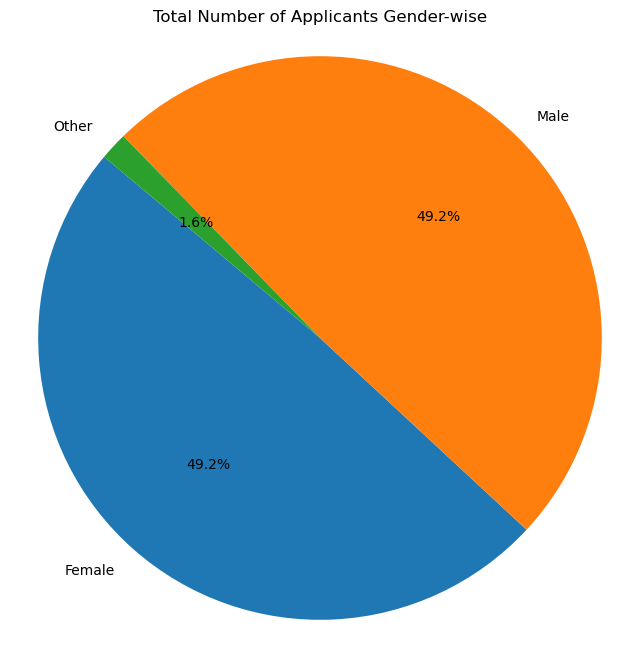

In [10]:
# Group by gender and count the occurrences
gender_counts = df['gender'].value_counts().reset_index()
gender_counts.columns = ['gender', 'counts']

# Display the result
print("Total number of applicants gender-wise:")
print(gender_counts)

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(gender_counts['counts'], labels=gender_counts['gender'], autopct='%1.1f%%', startangle=140)
plt.title('Total Number of Applicants Gender-wise')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

Education level of applicants under 20 years of age:
  employment_type  counts
0        Salaried      23
1   Self-employed       9
2      Government       6


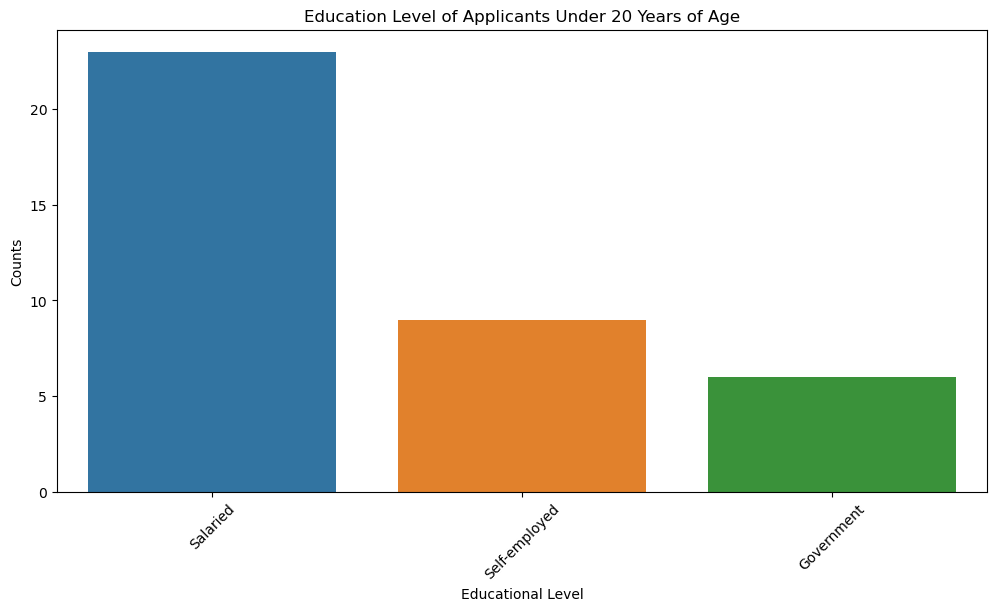

In [12]:
# Filter the DataFrame to include only applicants under 20 years of age
under_20_df = df[df['age'] < 20]

# Group by education level and count the occurrences
education_counts = under_20_df['employment_type'].value_counts().reset_index()
education_counts.columns = ['employment_type', 'counts']

# Display the result
print("Education level of applicants under 20 years of age:")
print(education_counts)

# Plotting the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='employment_type', y='counts', data=education_counts)
plt.title('Education Level of Applicants Under 20 Years of Age')
plt.xlabel('Educational Level')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.show()

In [13]:
# Group by AgeGroup and approval status to count the occurrences
approval_vs_Age = df.groupby(['AgeGroup', 'approval_status']).size().reset_index(name='counts')

# Display the result
print("Approval Status vs AgeGroup:")
print(approval_vs_Age)

# Optionally, visualize the results using a bar plot
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='AgeGroup', y='counts', hue='approval_status', data=approval_vs_Age)
plt.title('Approval Status vs AgeGroup')
plt.xlabel('AgeGroup')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.legend(title='Approval Status')

# Add data labels
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

plt.show()

Approval Status vs AgeGroup:
       AgeGroup approval_status  counts
0   20-30 years        Approved     113
1   20-30 years        Rejected      59
2   30-40 years        Approved     108
3   30-40 years        Rejected      46
4   40-50 years        Approved      97
5   40-50 years        Rejected      52
6   50-60 years        Approved     103
7   50-60 years        Rejected      46
8    < 20 years        Approved      22
9    < 20 years        Rejected      16
10  >= 60 years        Approved      63
11  >= 60 years        Rejected      27


In [14]:
# Filter the DataFrame to include only applicants under 20 years of age
under_20_df = df[df['age'] < 20]

# Group by education level and employment type and count the occurrences
education_employment_counts = under_20_df.groupby(['educational_level', 'employment_type']).size().reset_index(name='counts')

# Display the result
print("Education level and employment type of applicants under 20 years of age:")
print(education_employment_counts)

# Plotting the bar chart
plt.figure(figsize=(14, 7))
barplot = sns.barplot(x='educational_level', y='counts', hue='employment_type', data=education_employment_counts)
plt.title('Education Level and Employment Type of Applicants Under 20 Years of Age')
plt.xlabel('Educational Level')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.legend(title='Employment Type')
plt.show()

Education level and employment type of applicants under 20 years of age:
  educational_level employment_type  counts
0          Bachelor        Salaried      10
1          Bachelor   Self-employed       3
2       High School      Government       1
3       High School        Salaried       2
4            Master      Government       3
5            Master        Salaried       9
6            Master   Self-employed       6
7             Ph.D.      Government       2
8             Ph.D.        Salaried       2


In [6]:

#Calculate the remaining salary
df['Remaining_Salary'] = df['MonthlySalary'] - df['monthly_obligations']

# Drop rows where the remaining salary is negative and the applicant is unemployed and the loan is approved
df = df[~((df['Remaining_Salary'] < 0) & (df['approval_status'] == 'Approved') & (df['employment_type'] == 'Unemployed'))]

# Drop rows where the employment type is 'Unemployed' and the loan is approved
df = df[~((df['employment_type'] == 'Unemployed') & (df['approval_status'] == 'Approved'))]

# Drop the 'Remaining_Salary' column if it's no longer needed
df = df.drop(columns=['Remaining_Salary'])

# Display the first few rows of the updated DataFrame to verify the changes
print("Updated DataFrame after filtering:")
print(df.head())


Updated DataFrame after filtering:
   loan_id  gender  age     AgeGroup marital_status  no_of_dependents  \
0      811  Female   19   < 20 years        Married                 3   
1     1232    Male   62  >= 60 years         Single                 2   
2      889    Male   22  20-30 years        Married                 0   
3      192  Female   20  20-30 years         Single                 1   
4     1185    Male   60  >= 60 years        Married                 0   

  educational_level employment_type geographical_location type_of_residence  \
0             Ph.D.        Salaried                 Urban             Owned   
1          Bachelor        Salaried                 Urban             Owned   
2            Master      Government                 Urban            Rented   
3            Master      Government                 Rural             Owned   
4             Ph.D.   Self-employed                 Urban      With Parents   

   ...           cibil_scorebins residential_assets

In [15]:
df.count()

loan_id                       752
gender                        752
age                           752
AgeGroup                      752
marital_status                752
no_of_dependents              752
educational_level             752
employment_type               752
geographical_location         752
type_of_residence             752
income_annum                  752
income_buckets                752
MonthlySalary                 752
monthly_obligations           752
savings_account_balance       752
Savings_bins                  752
investment_portfolio_value    752
investment_bins               752
insurance_policies            752
insurance_bins                752
loan_amount                   752
Loan_bins                     752
loan_term_yrs                 752
term_bins                     752
loan_purpose                  752
approval_status               752
previous_loan_experience      752
credit_history                752
cibil_score                   752
cibil_scorebin

In [7]:
df.describe()

loan_id         age  no_of_dependents  income_annum  MonthlySalary  \
count   752.000000  752.000000        752.000000  7.520000e+02     752.000000   
mean   1029.897606   40.728723          1.978723  1.178284e+06   98190.336436   
std     580.046895   13.970325          1.402708  4.954928e+05   41291.067301   
min       6.000000   18.000000          0.000000  3.029480e+05   25246.000000   
25%     529.250000   28.000000          1.000000  7.355528e+05   61295.750000   
50%    1031.500000   40.000000          2.000000  1.204466e+06  100372.500000   
75%    1538.500000   53.000000          3.000000  1.621661e+06  135138.750000   
max    1997.000000   64.000000          4.000000  1.997229e+06  166436.000000   

       monthly_obligations  savings_account_balance  \
count           752.000000               752.000000   
mean          24132.525266            249480.543883   
std           14808.199659            143248.129391   
min              46.000000             10837.000000   
25%           11220.250000            124613.250000   
50%           23347.500000            246340.000000   
75%           37069.500000            370978.750000   
max           49996.000000            499905.000000   

       investment_portfolio_value  insurance_policies   loan_amount  \
count                  752.000000        7.520000e+02  7.520000e+02   
mean                499496.547872        2.431376e+06  1.527893e+07   
std                 275637.679644        1.398199e+06  8.979049e+06   
min                     59.000000        5.050300e+04  8.307700e+04   
25%                 270409.750000        1.192832e+06  7.127627e+06   
50%                 492979.500000        2.372505e+06  1.526646e+07   
75%                 742364.500000        3.627684e+06  2.329773e+07   
max                 999559.000000        4.999236e+06  2.998656e+07   

       loan_term_yrs  cibil_score  residential_assets_value  \
count     752.000000   752.000000              7.520000e+02   
mean       17.819149   665.680851              1.464522e+07   
std         8.823872   164.761828              8.579303e+06   
min         5.000000     0.000000              3.332100e+04   
25%        10.000000   648.500000              7.159550e+06   
50%        20.000000   713.000000              1.445585e+07   
75%        25.000000   771.000000              2.216329e+07   
max        30.000000   900.000000              2.996553e+07   

       commercial_assets_value  luxury_assets_value  bank_asset_value  
count             7.520000e+02         7.520000e+02      7.520000e+02  
mean              1.519585e+07         1.506178e+07      1.524990e+07  
std               8.639946e+06         8.459063e+06      8.713849e+06  
min               3.022500e+04         2.660600e+04      5.800000e+02  
25%               7.479548e+06         8.116113e+06      7.648770e+06  
50%               1.576419e+07         1.495886e+07      1.565731e+07  
75%               2.251858e+07         2.195793e+07      2.299148e+07  
max               2.997946e+07         2.994098e+07      2.998018e+07

In [40]:
filtered_df = df[
    (df['approval_status'] == 'Approved') &
    (df['cibil_scorebins'] == '600-649: Doubtfull Score')]

# Calculate the Remaining_Salary
filtered_df['Remaining_Salary'] = filtered_df['MonthlySalary'] - filtered_df['monthly_obligations']

# Filter for negative Remaining_Salary values
negative_remaining_salary_df = filtered_df[filtered_df['Remaining_Salary'] < 0]

# Display the rows with negative Remaining_Salary values (optional)
print(negative_remaining_salary_df[['monthly_obligations', 'MonthlySalary', 'Remaining_Salary']])

# Drop the rows with negative Remaining_Salary from the original DataFrame
df = df.drop(negative_remaining_salary_df.index)

     monthly_obligations  MonthlySalary  Remaining_Salary
176                41435        33178.0           -8257.0
347                44401        40256.0           -4145.0
627                42588        32514.0          -10074.0


C:\Users\vyshn\AppData\Local\Temp\ipykernel_26016\309686127.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Remaining_Salary'] = filtered_df['MonthlySalary'] - filtered_df['monthly_obligations']


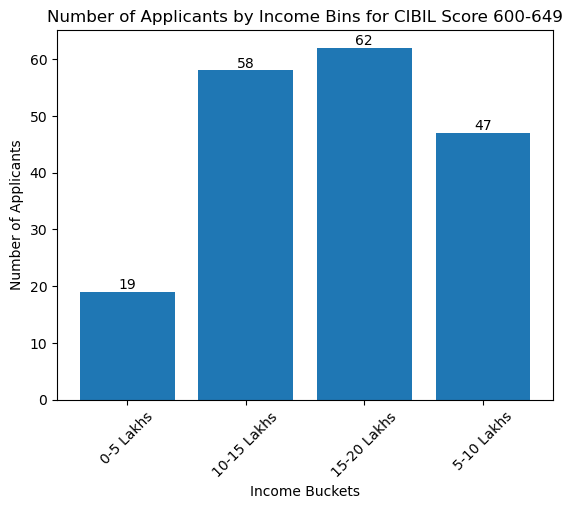

In [41]:
# Total no of applicants under each Income Bucket
# Filter the DataFrame for CIBIL score range 600-649
filtered_df = df[df['cibil_scorebins'] == '600-649: Doubtfull Score']

# Group by income bins and count the number of applicants
income_bin_counts = filtered_df.groupby('income_buckets').size()

# Plot the graph
plt.bar(income_bin_counts.index, income_bin_counts.values)
plt.xlabel('Income Buckets')
plt.ylabel('Number of Applicants')
plt.title('Number of Applicants by Income Bins for CIBIL Score 600-649')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Add annotations to the bars
for i, count in enumerate(income_bin_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()


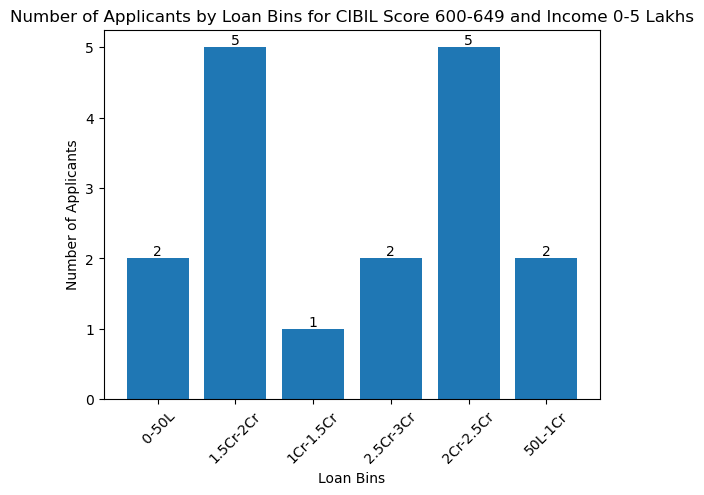

In [27]:
# Filter the DataFrame for CIBIL score range 600-649
filtered_df = df[df['cibil_scorebins'] == '600-649: Doubtfull Score']

# Further filter for income bin '0-5 Lakhs'
filtered_df = filtered_df[filtered_df['income_buckets'] == '0-5 Lakhs']

# Group by loan bins and count the number of applicants
loan_bin_counts = filtered_df.groupby('Loan_bins').size()

# Plot the graph
plt.bar(loan_bin_counts.index, loan_bin_counts.values)
plt.xlabel('Loan Bins')
plt.ylabel('Number of Applicants')
plt.title('Number of Applicants by Loan Bins for CIBIL Score 600-649 and Income 0-5 Lakhs')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Add annotations to the bars
for i, count in enumerate(loan_bin_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()


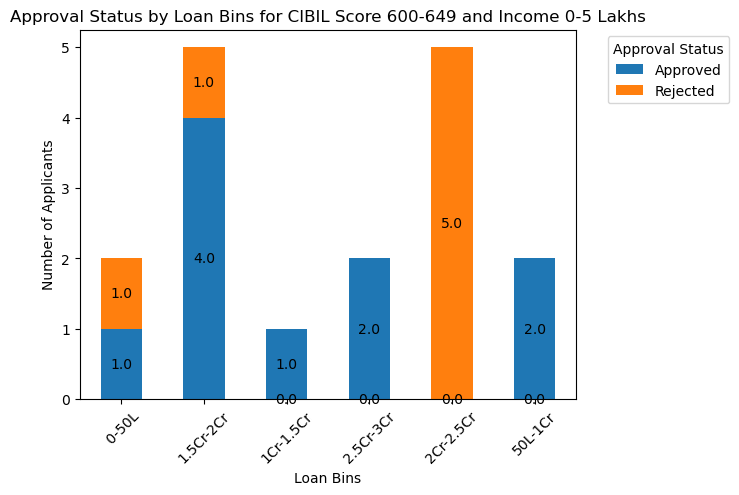

In [29]:
# Filter the DataFrame for CIBIL score range 600-649
filtered_df = df[df['cibil_scorebins'] == '600-649: Doubtfull Score']

# Further filter for income bin '0-5 Lakhs'
filtered_df = filtered_df[filtered_df['income_buckets'] == '0-5 Lakhs']

# Group by loan bins and approval status, and count the number of applicants
approval_counts = filtered_df.groupby(['Loan_bins', 'approval_status']).size().unstack(fill_value=0)

# Plot the graph
ax = approval_counts.plot(kind='bar', stacked=True)
plt.xlabel('Loan Bins')
plt.ylabel('Number of Applicants')
plt.title('Approval Status by Loan Bins for CIBIL Score 600-649 and Income 0-5 Lakhs')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Approval Status', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add annotations to each segment of the stacked bar graph
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height}', (x + width / 2, y + height / 2), ha='center', va='center')

plt.show()


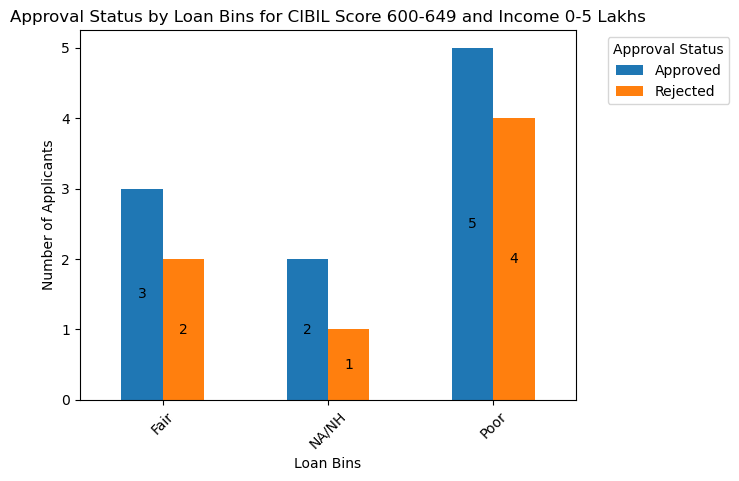

In [30]:
# Filter the DataFrame for CIBIL score range 600-649
filtered_df = df[df['cibil_scorebins'] == '600-649: Doubtfull Score']

# Further filter for income bin '0-5 Lakhs'
filtered_df = filtered_df[filtered_df['income_buckets'] == '0-5 Lakhs']
 
# Group by loan bins and approval status, and count the number of applicants
approval_counts = filtered_df.groupby(['credit_history', 'approval_status']).size().unstack(fill_value=0)

# Plot the graph
ax = approval_counts.plot(kind='bar', stacked=False)
plt.xlabel('Loan Bins')
plt.ylabel('Number of Applicants')
plt.title('Approval Status by Loan Bins for CIBIL Score 600-649 and Income 0-5 Lakhs')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Approval Status', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add annotations to each segment of the stacked bar graph
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height}', (x + width / 2, y + height / 2), ha='center', va='center')

plt.show()


In [31]:

filtered_df = df[(df['cibil_scorebins'] == '600-649: Doubtfull Score') & 
                 (df['income_buckets'] == '0-5 Lakhs') & 
                 (df['Loan_bins'] == ' 0-50L')]

print(filtered_df)




     loan_id  gender  age     AgeGroup marital_status  no_of_dependents  \
370      875    Male   32  30-40 years        Married                 4   
536     1756  Female   59  50-60 years       Divorced                 1   

    educational_level employment_type geographical_location type_of_residence  \
370          Bachelor   Self-employed                 Urban             Owned   
536            Master   Self-employed                 Urban            Rented   

     ...           cibil_scorebins residential_assets_value  \
370  ...  600-649: Doubtfull Score                 17099975   
536  ...  600-649: Doubtfull Score                  8048951   

     Residentialasset_bins  commercial_assets_value  Commertialasset_bins  \
370              1.5Cr-2Cr                 29497119             2.5Cr-3Cr   
536            50Lakhs-1Cr                 14914035             1Cr-1.5Cr   

    luxury_assets_value  Luxuryasset_bins bank_asset_value  Bankasset_bins  \
370             7714345       

In [12]:
import pandas as pd

# Data from the provided image
data = {
    'Credit Score': ['Fair', 'NA/NH', 'Poor'],
    'Acceptance': [3, 2, 6],
    'Rejection': [3, 1, 5]
}
df = pd.DataFrame(data)

# Calculate acceptance and rejection rates
df['Total'] = df['Acceptance'] + df['Rejection']
df['Acceptance Rate'] = df['Acceptance'] / df['Total']
df['Rejection Rate'] = df['Rejection'] / df['Total']

# Display the dataframe with rates
print(df[['Credit Score', 'Acceptance Rate', 'Rejection Rate']])


  Credit Score  Acceptance Rate  Rejection Rate
0         Fair         0.500000        0.500000
1        NA/NH         0.666667        0.333333
2         Poor         0.545455        0.454545


     loan_id  gender  age     AgeGroup marital_status  no_of_dependents  \
52      1907  Female   49  40-50 years        Married                 2   
53      1894    Male   37  30-40 years        Married                 2   
93      1900  Female   20  20-30 years        Married                 0   
114     1677    Male   54  50-60 years        Married                 4   
166     1940    Male   48  40-50 years       Divorced                 4   

    educational_level employment_type geographical_location type_of_residence  \
52        High School   Self-employed                 Urban             Owned   
53           Bachelor        Salaried                 Urban             Owned   
93           Bachelor   Self-employed                 Rural            Rented   
114          Bachelor   Self-employed                 Urban             Owned   
166          Bachelor      Government                 Urban             Owned   

     ...           cibil_scorebins residential_assets_value  \

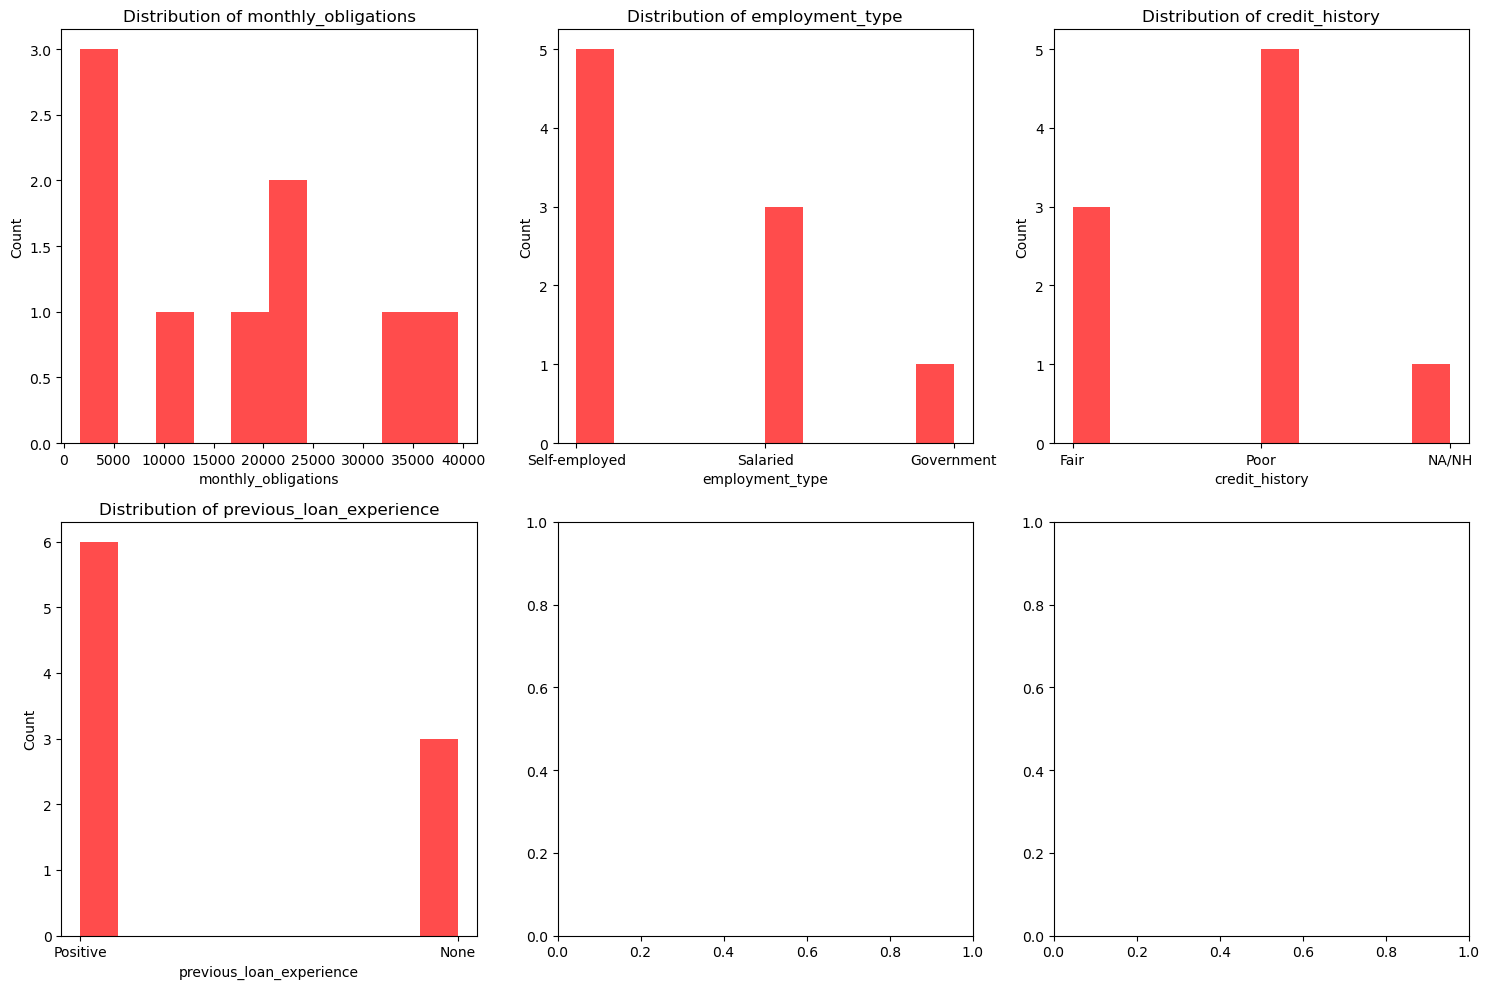

In [57]:
# Filter the DataFrame for CIBIL score range 600-649
filtered_df = df[df['cibil_scorebins'] == '600-649: Doubtfull Score']

# Further filter for income bin '0-5 Lakhs'
filtered_df = filtered_df[filtered_df['income_buckets'] == '0-5 Lakhs']

# Further filter for 'Rejected' applications
rejected_data = filtered_df[filtered_df['approval_status'] == 'Rejected']

# Display the first few rows of the filtered dataset
print(rejected_data.head())

# Analyze key factors for rejection
key_factors = ['monthly_obligations', 'employment_type', 'credit_history', 'previous_loan_experience']
summary_stats = rejected_data[key_factors].describe()

# Display summary statistics
print(summary_stats)

# Visualize the distribution of key factors
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for i, factor in enumerate(key_factors):
    if factor in rejected_data.columns:
        axes[i].hist(rejected_data[factor].dropna(), bins=10, color='red', alpha=0.7)
        axes[i].set_title(f'Distribution of {factor}')
        axes[i].set_xlabel(factor)
        axes[i].set_ylabel('Count')
    else:
        axes[i].text(0.5, 0.5, 'Data not available', horizontalalignment='center', verticalalignment='center')
        axes[i].set_title(f'Distribution of {factor}')

plt.tight_layout()
plt.show()

     loan_id  gender  age     AgeGroup marital_status  no_of_dependents  \
52      1907  Female   49  40-50 years        Married                 2   
53      1894    Male   37  30-40 years        Married                 2   
93      1900  Female   20  20-30 years        Married                 0   
114     1677    Male   54  50-60 years        Married                 4   
166     1940    Male   48  40-50 years       Divorced                 4   

    educational_level employment_type geographical_location type_of_residence  \
52        High School   Self-employed                 Urban             Owned   
53           Bachelor        Salaried                 Urban             Owned   
93           Bachelor   Self-employed                 Rural            Rented   
114          Bachelor   Self-employed                 Urban             Owned   
166          Bachelor      Government                 Urban             Owned   

     ...           cibil_scorebins residential_assets_value  \

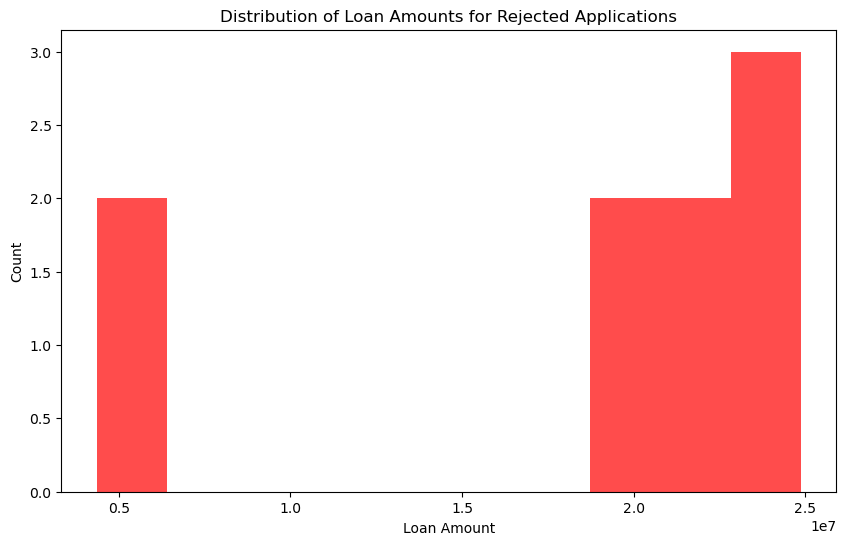

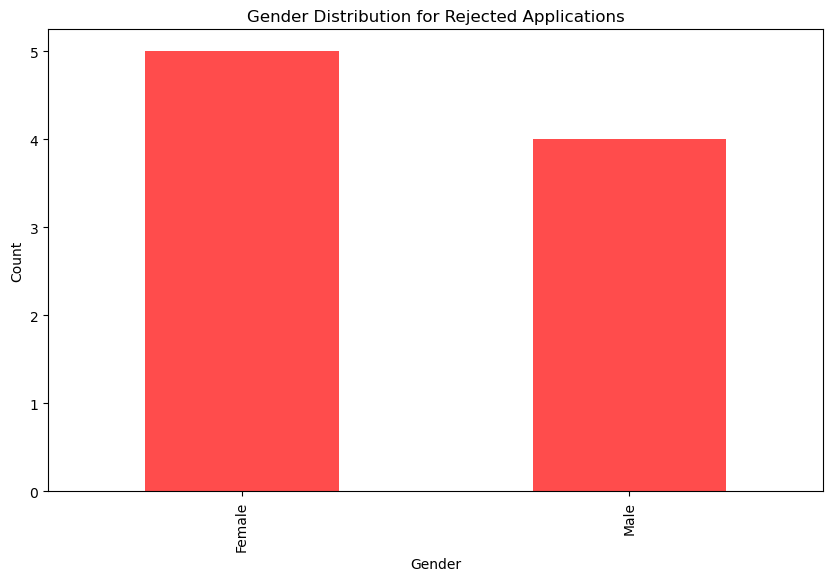

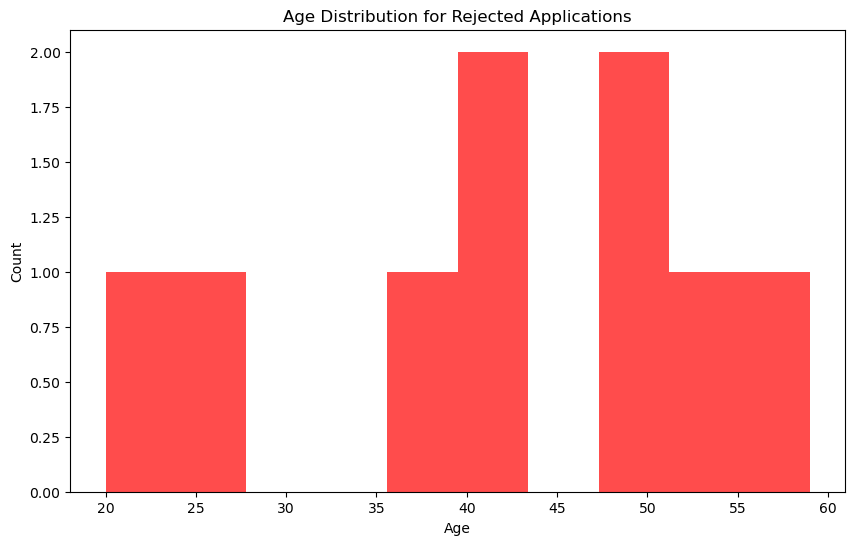

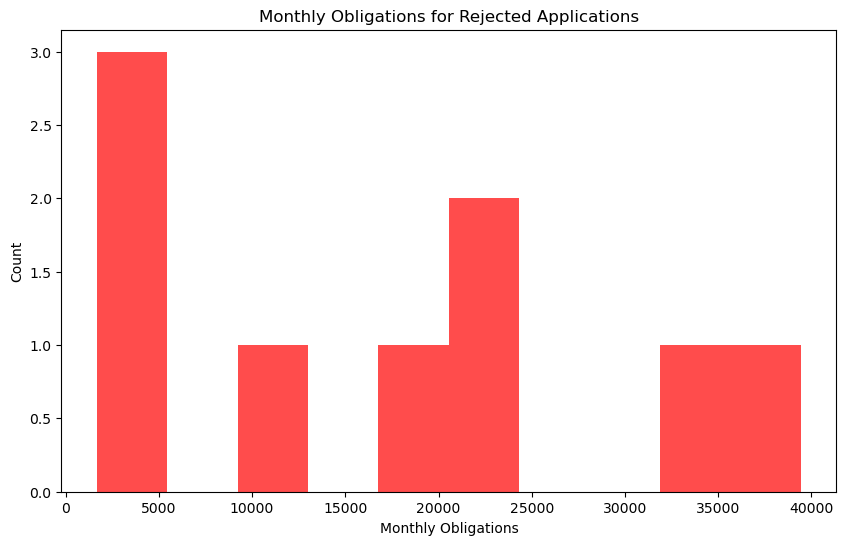

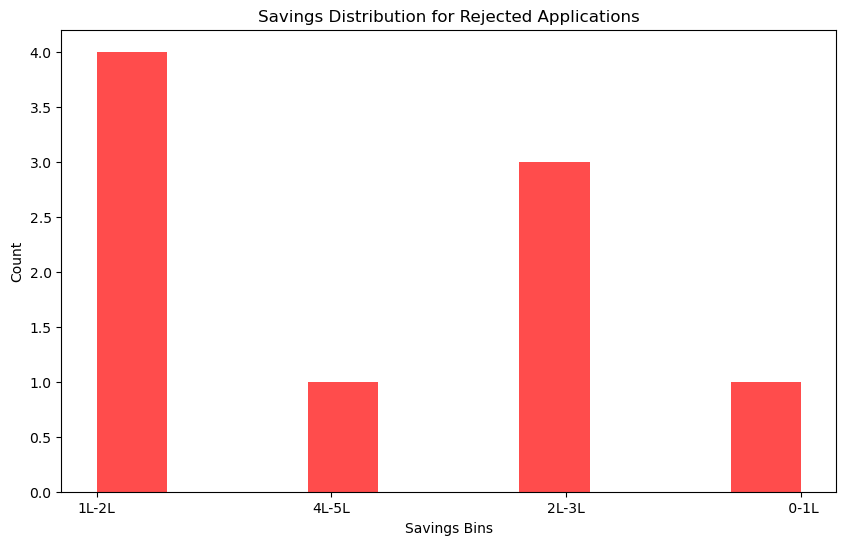

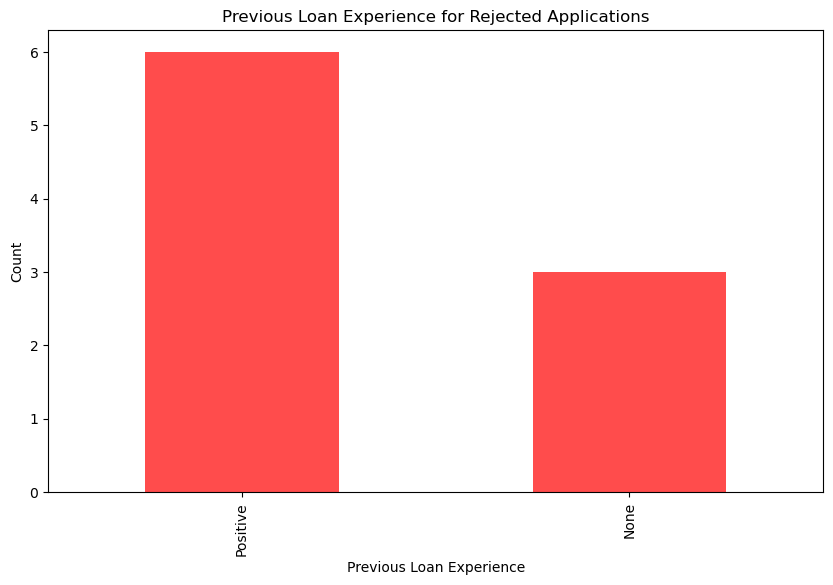

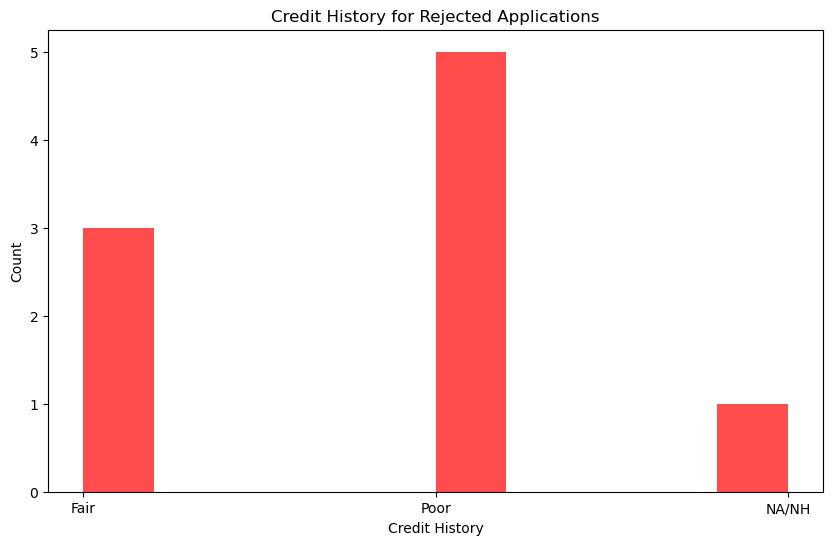

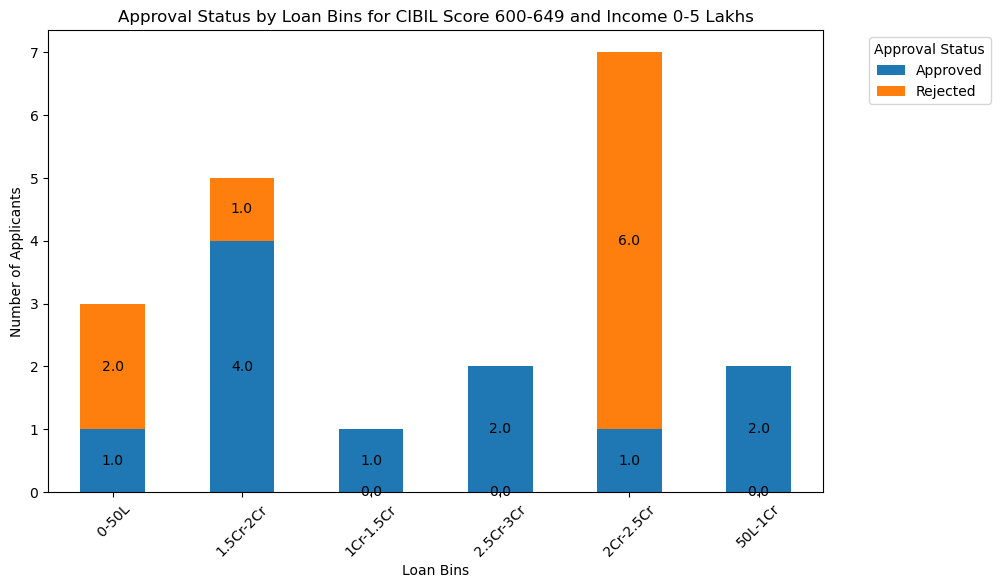

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the dataset is already loaded in the variable `data_600_649`

# Filter the DataFrame for CIBIL score range 600-649
filtered_df = df[df['cibil_scorebins'] == '600-649: Doubtfull Score']

# Further filter for income bin '0-5 Lakhs'
filtered_df = filtered_df[filtered_df['income_buckets'] == '0-5 Lakhs']

# Further filter for 'Rejected' applications
rejected_data = filtered_df[filtered_df['approval_status'] == 'Rejected']

# Display the first few rows of the filtered dataset
print(rejected_data.head())

# Analysis 1: Distribution of Loan Amounts
plt.figure(figsize=(10, 6))
plt.hist(rejected_data['loan_amount'], bins=10, color='red', alpha=0.7)
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.title('Distribution of Loan Amounts for Rejected Applications')
plt.show()

# Analysis 2: Demographic Analysis
# Plot gender distribution
plt.figure(figsize=(10, 6))
rejected_data['gender'].value_counts().plot(kind='bar', color='red', alpha=0.7)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution for Rejected Applications')
plt.show()

# Plot age distribution
plt.figure(figsize=(10, 6))
plt.hist(rejected_data['age'], bins=10, color='red', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution for Rejected Applications')
plt.show()

# Analysis 3: Financial Health Indicators
# Plot monthly obligations
plt.figure(figsize=(10, 6))
plt.hist(rejected_data['monthly_obligations'], bins=10, color='red', alpha=0.7)
plt.xlabel('Monthly Obligations')
plt.ylabel('Count')
plt.title('Monthly Obligations for Rejected Applications')
plt.show()

# Plot savings distribution
plt.figure(figsize=(10, 6))
plt.hist(rejected_data['Savings_bins'].dropna(), bins=10, color='red', alpha=0.7)
plt.xlabel('Savings Bins')
plt.ylabel('Count')
plt.title('Savings Distribution for Rejected Applications')
plt.show()

# Analysis 4: Credit History
# Plot previous loan experience
plt.figure(figsize=(10, 6))
rejected_data['previous_loan_experience'].value_counts().plot(kind='bar', color='red', alpha=0.7)
plt.xlabel('Previous Loan Experience')
plt.ylabel('Count')
plt.title('Previous Loan Experience for Rejected Applications')
plt.show()

# Plot credit history
plt.figure(figsize=(10, 6))
plt.hist(rejected_data['credit_history'].dropna(), bins=10, color='red', alpha=0.7)
plt.xlabel('Credit History')
plt.ylabel('Count')
plt.title('Credit History for Rejected Applications')
plt.show()

# Additional Analysis: Approval Status by Loan Bins
# Group by loan bins and approval status, and count the number of applicants
approval_counts = filtered_df.groupby(['Loan_bins', 'approval_status']).size().unstack(fill_value=0)

# Plot the graph
ax = approval_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Loan Bins')
plt.ylabel('Number of Applicants')
plt.title('Approval Status by Loan Bins for CIBIL Score 600-649 and Income 0-5 Lakhs')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Approval Status', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add annotations to each segment of the stacked bar graph
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height}', (x + width / 2, y + height / 2), ha='center', va='center')

plt.show()


In [68]:
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming you already have your DataFrame 'df' loaded with your data

# Filter the DataFrame for specific conditions
filtered_df = df[(df['cibil_scorebins'] == '750-900: Excellent Score')]

# Create a contingency table
contingency_table = pd.crosstab(filtered_df['approval_status'], filtered_df['credit_history'])

# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-Square Test Statistic: {chi2}")
print(f"P-Value: {p}")

# Interpret the result
if p < 0.05:
    print("Reject the null hypothesis: There is a significant association between approval status and credit history.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between approval status and credit history.")


Chi-Square Test Statistic: 0.0
P-Value: 1.0
Fail to reject the null hypothesis: There is no significant association between approval status and credit history.


In [69]:
import pandas as pd

# Assuming you already have your DataFrame 'df' loaded with your data

# Filter the DataFrame for specific conditions
filtered_df = df[(df['approval_status'] == 'Approved') &
                 (df['cibil_scorebins'] == '600-649: Doubtfull Score') &
                 (df['income_buckets'] == '0-5 Lakhs') &
                 (df['Loan_bins'] == '0-50 L')]

# Check the filtered DataFrame
print(filtered_df.head())
print(f"Number of rows after filtering: {filtered_df.shape[0]}")


Empty DataFrame
Columns: [loan_id, gender, age, AgeGroup, marital_status, no_of_dependents, educational_level, employment_type, geographical_location, type_of_residence, income_annum, income_buckets, MonthlySalary, monthly_obligations, savings_account_balance, Savings_bins, investment_portfolio_value, investment_bins, insurance_policies, insurance_bins, loan_amount, Loan_bins, loan_term_yrs, term_bins, loan_purpose, approval_status, previous_loan_experience, credit_history, cibil_score, cibil_scorebins, residential_assets_value, Residentialasset_bins, commercial_assets_value, Commertialasset_bins, luxury_assets_value, Luxuryasset_bins, bank_asset_value, Bankasset_bins, property_ownership]
Index: []

[0 rows x 39 columns]
Number of rows after filtering: 0


In [71]:
# Calculate Remaining_Salary
df['Remaining_Salary'] = df['MonthlySalary'] - df['monthly_obligations']

# Display the first few rows to ensure it was calculated correctly
print(df[['MonthlySalary', 'monthly_obligations', 'Remaining_Salary']].head())


   MonthlySalary  monthly_obligations  Remaining_Salary
0        80470.0                41026           39444.0
1        88357.0                 6395           81962.0
2       118673.0                40504           78169.0
3        57031.0                33884           23147.0
4       125644.0                24317          101327.0


In [73]:
# Filter the DataFrame for specific conditions
filtered_df = df[
    (df['approval_status'] == 'Approved') &
    (df['cibil_scorebins'] == '600-649: Doubtfull Score')
]

# Check if the filtered DataFrame is empty
if filtered_df.empty:
    print("The DataFrame is empty after applying the filters.")
else:
    print(filtered_df.head())
    print(f"Number of rows after filtering: {filtered_df.shape[0]}")


    loan_id  gender  age     AgeGroup marital_status  no_of_dependents  \
0       811  Female   19   < 20 years        Married                 3   
1      1232    Male   62  >= 60 years         Single                 2   
2       889    Male   22  20-30 years        Married                 0   
4      1185    Male   60  >= 60 years        Married                 0   
11      285  Female   63  >= 60 years        Married                 4   

   educational_level employment_type geographical_location type_of_residence  \
0              Ph.D.        Salaried                 Urban             Owned   
1           Bachelor        Salaried                 Urban             Owned   
2             Master      Government                 Urban            Rented   
4              Ph.D.   Self-employed                 Urban      With Parents   
11            Master        Salaried                 Urban             Owned   

    ...  residential_assets_value Residentialasset_bins  \
0   ...        

In [74]:
from scipy.stats import chi2_contingency

# Create a contingency table for approval_status and credit_history
contingency_table = pd.crosstab(filtered_df['approval_status'], filtered_df['credit_history'])

# Perform Chi-Square Test
if not contingency_table.empty:
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Print the results
    print(f"Chi-Square Test Statistic: {chi2}")
    print(f"P-Value: {p}")

    # Interpret the result
    if p < 0.05:
        print("Reject the null hypothesis: There is a significant association between approval status and credit history.")
    else:
        print("Fail to reject the null hypothesis: There is no significant association between approval status and credit history.")
else:
    print("Contingency table is empty. Cannot perform Chi-Square Test.")


Chi-Square Test Statistic: 0.0
P-Value: 1.0
Fail to reject the null hypothesis: There is no significant association between approval status and credit history.


In [82]:
import statsmodels.api as sm

# Prepare the data for logistic regression
filtered_df['approval_status_binary'] = filtered_df['approval_status'].apply(lambda x: 1 if x == 'Approved' else 0)
X = filtered_df[['cibil_score', 'MonthlySalary', 'loan_amount']]
X = sm.add_constant(X)  # Add a constant term for the intercept
y = filtered_df['approval_status_binary']

# Fit the logistic regression model
model = sm.Logit(y, X).fit()

# Print the summary of the model
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.622280
         Iterations 5
                             Logit Regression Results                             
Dep. Variable:     approval_status_binary   No. Observations:                  193
Model:                              Logit   Df Residuals:                      189
Method:                               MLE   Df Model:                            3
Date:                    Tue, 11 Jun 2024   Pseudo R-squ.:                0.002541
Time:                            14:09:52   Log-Likelihood:                -120.10
converged:                           True   LL-Null:                       -120.41
Covariance Type:                nonrobust   LLR p-value:                    0.8937
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.9086      0.691      1.315      0.188      -0.445 

C:\Users\vyshn\AppData\Local\Temp\ipykernel_23104\1339123273.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['approval_status_binary'] = filtered_df['approval_status'].apply(lambda x: 1 if x == 'Approved' else 0)


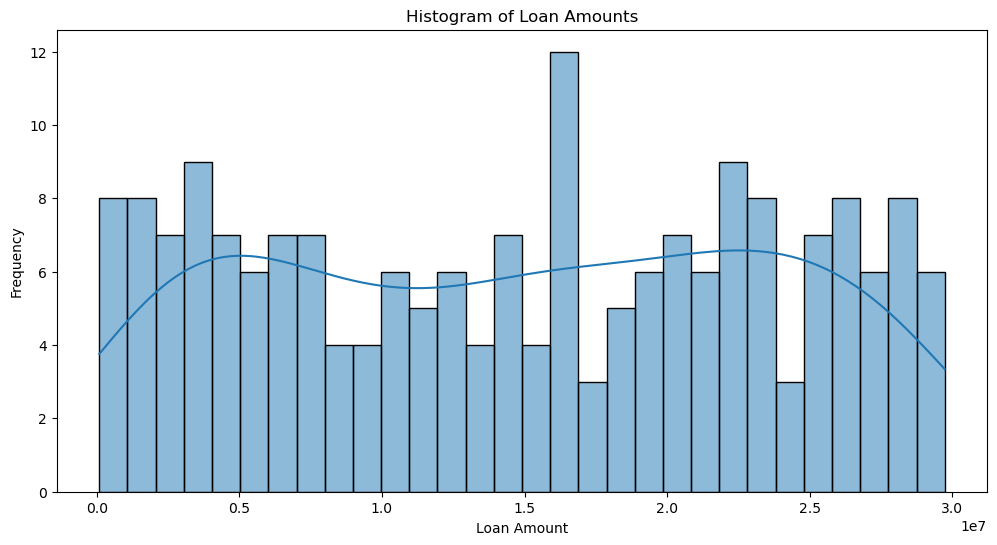

In [85]:
# Histogram of loan amounts
plt.figure(figsize=(12, 6))
sns.histplot(filtered_df['loan_amount'], bins=30, kde=True)
plt.title('Histogram of Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()


In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot of loan amounts by cibil_scorebins
plt.figure(figsize=(12, 6))
sns.boxplot(x='cibil_scorebins', y='loan_amount', data=filtered_df)
plt.title('Boxplot of Loan Amounts by Credit Score Bins')
plt.xlabel('Credit Score Bins')
plt.ylabel('Loan Amount')
plt.xticks(rotation=45)
plt.show()


In [87]:
import statsmodels.api as sm

# Prepare the data for multiple regression
X = filtered_df[['MonthlySalary', 'cibil_score', 'no_of_dependents']]
X = sm.add_constant(X)  # Add a constant term for the intercept
y = filtered_df['loan_amount']

# Fit the multiple regression model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            loan_amount   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     3.371
Date:                Tue, 11 Jun 2024   Prob (F-statistic):             0.0196
Time:                        14:12:56   Log-Likelihood:                -3356.9
No. Observations:                 193   AIC:                             6722.
Df Residuals:                     189   BIC:                             6735.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.844e+07   2.73e+06  